In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import pandas as pd

In [3]:
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
import re

# Scrape

In [6]:
url = 'https://www.ninisite.com/discussion'
req = requests.get(url)
soup = BeautifulSoup(req.content, 'lxml')

In [7]:
topic_num = soup.find_all('span', 'topic_number m-x-0')
topic_name = soup.find_all('a', 'category--title')

# Preprocess

In [8]:
num_col = []
for e in topic_num:
    num_col.append(int(e.text.split()[0]))
num_col = pd.Series(num_col)

In [9]:
name_col = []
for e in topic_name:
    name_col.append(e.text.strip())
name_col = pd.Series(name_col)

In [10]:
d = {
    'topic': name_col,
    'number': num_col
}

In [11]:
df = pd.DataFrame(d)

# What are the most popular topics?

In [12]:
df.sort_values('number', ascending=False).head()

,topic,number
124,عمومی,2434244
123,درد دل,456714
2,آمادگی و اقدام برای بارداری,187847
61,طرح مسئله - راه حل,138964
41,آرایش و زیبائی,107242


# عمومی
### عمومی is the most popular topic, so we dig into it
https://www.ninisite.com/discussion/forum/131/%D8%B9%D9%85%D9%88%D9%85%DB%8C

In [13]:
subjects_html = []
for i in range(100):
    url = 'https://www.ninisite.com/discussion/forum/131/%D8%B9%D9%85%D9%88%D9%85%DB%8C?page={}'.format(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'lxml')
    subjects_html += soup.find_all('span', 'topic_subject')

In [14]:
subjects = []
for s in subjects_html:
    subjects.append(s.text)

In [15]:
# convert the list to a giant string
subjects_str = '\n'.join(subjects) 

In [16]:
# clean the string
weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
clean_text = weridPatterns.sub(r'', subjects_str)

In [17]:
text = arabic_reshaper.reshape(clean_text)
text = get_display(text)

In [18]:
stopwords = {
    'و', 'سلام', 'با', 'در', 'چند', 'کی', 'چیزی', 'باشی', 'سه', 'میاری', 'بودم', 'بقیه'
    , 'دارم', 'رو', 'را', 'زیر', 'که', 'واقعا', 'میارم', 'خب', 'عزیز', 'شد', 'شاید', 'حدود'
    , 'به', 'من', 'تو', 'از', 'هم', 'کنیم', 'بوده', 'چقدر', 'نظرم', 'بگین', 'حتی', 'دقیقا'
    , 'خیلی', 'برای', 'ولی', 'بعد', 'توی', 'بگید', 'داشته', 'بنظرتون', 'بی', 'یک', 'صفحه'
    , 'اگه', 'این', 'میشه', 'یه', 'نیست', 'نظرتون', 'داری', 'بگید', 'وقتی', 'بد', 'دارن', 'بدین'
    , 'هست', 'بود', 'تا', 'دیگه', 'به', 'همه', 'هستم', 'شدم', 'چیه', 'بشم', 'کرده', 'بهم', 'میگن'
    , 'کردم', 'کن', 'اون', 'چرا', 'چون', 'هر', 'باشم', 'پیش', 'بشه', 'میتونم', 'هیچ', 'آره', 'بگم'
    , 'نه', 'میاد', 'کنید', 'یا', 'داره', 'منم', 'خوبی', 'ثبت', 'برام', 'اول', 'خود', 'بگه', 'کم', 'یعنی'
    , 'باشه', 'الان', 'ممنون', 'میشم', 'بدید', 'نظر', 'دوستان', 'باشید', 'زدم', 'گفتم', 'ندارم', 'بالا', 'بودن', 'اینا'
    , 'کنم', 'نداره', 'بهتر', 'واسه', 'لطفا', 'سال', 'زیاد' , 'احتمالا', 'میکنه', 'برو', 'فک', 'همین', 'نمیدونم', 'کسی'
    , 'فقط', 'حتما', 'اینجا', 'اصلا', 'ک', 'چه', 'میکنم', 'سوال', 'بار', 'درصد', 'درست', 'رتبم', 'ام'
    , 'خوبه', 'است', 'خوب', 'چی', 'بچه‌ها', 'مبارک', 'مرسی', 'نمیشه', 'قبل', 'درسته', 'هیچ', 'همون', 'وقت'
    , 'باید', 'ب', 'برا', 'یکی', 'شده', 'ای', 'دو', 'کنی', 'ما', 'میخوام', 'پایین',  'امسال', 'بزارم'
    , 'بله', 'کنه', 'روز', 'بده', 'اگر', 'عزیزم', 'خودم', 'منطقه', 'قبول', 'پارسال', 'میتونی', 'جواب', 'دیدم', 'میگه'
    , 'حالا', 'مثل', 'ی', 'کردن', 'اره', 'اما', 'خودت', 'اینو', 'حدودا', 'میشی', 'دیدم', 'دوست', 'زده', 'مثلا'
    , 'البته', 'پس', 'میگم', 'یکم', 'گفته', 'قطعا', 'امیدوارم', 'کلا', 'کرد', 'بچه', 'مگه', 'چطوره'
    , 'باشین', 'سایت', 'بیاد', 'بدتر', 'همیشه', 'نفر', 'میکنی', 'بین', 'گفت', 'دادم', 'درصدام', 'شما'
    , 'بار', 'درصدای', 'کدوم', 'اینکه', 'کجا', 'وزنی', 'ممکنه', 'درصدا', 'درصدها', 'شدن', 'نکن', 'بهش'
    , 'تموم', 'رفتم', 'کاربر', 'منو', 'اضافه', 'بیشتر', 'عیدتون', 'میدونه', 'گفتن', 'میده', 'اینه', 'میگه', 'باز', 'بهت'
    , 'خوش', 'آقای', 'خواهش', 'کاش', 'داشتم', 'نیاز', 'بخیر', 'زدن', 'یاد', 'کاری', 'ببین', 'باش', 'رتبه‌ها', 'بیارم'
    , 'کنین', 'باز', 'اونم', 'اف', 'میکنن', 'بچهها', 'راه', 'درصدهای', 'تراز', 'سطح', 'وای', 'حداقل', 'ببخشید', 'برم'
    , 'بدون', 'هفته', 'ماه', 'ها', 'بدم', 'نبود', 'هایی', 'خانم', 'آیا', 'زدی', 'چطور', 'بیایین', 'دارین', 'چجوری'
    , 'نیس', 'دادن', 'میخواد', 'بهتره', 'کامنت', 'ده', 'شروع', 'چیز', 'میخواد', 'گرفتن', 'بگیرم', 'استفاده', 'سر', 'چ'
    , 'اونایی', 'چطوری', 'کردین', 'لحظه', 'اسم', 'بلده', 'جای', 'میخام', 'کیا', 'بیاید', 'نی', 'گرفته', 'میکنید', 'بیاین'
    , 'بیان', 'های', 'چیکار', 'کننده', 'گرفتم', 'پیدا', 'دور', 'دست', 'اومده', 'تورو', 'براتون', 'تاپیک', 'بزنم', 'چقد'
    , 'فردا', 'داریم', 'میتونه', 'انجام', 'رفت', 'بهترین', 'ساله', 'بخرم', 'زود', 'بچها', 'عکس', 'دار', 'ترین', 'دارید'
    , 'خانمای', 'راجب', 'چکار', 'کسایی', 'هستن', 'هرکی', 'ع', 'می', 'داده', 'داد', 'پیام', 'حرف', 'خانما', 'بیایید'
    , 'بگیره', 'بیا', 'تاحالا', 'رفته', 'امروز', 'همش', 'نام', 'کاربری', 'خواهشا', 'خانوما', 'هنوز', 'باهاش', 'خانومای'
    , '', '', '', '', '', '', '', '', '', '', '', '', '', ''
}

In [19]:
sws = set()
for w in stopwords:
    sw = arabic_reshaper.reshape(w)
    sw = get_display(sw)
    sws.add(sw)

In [20]:
wordcloud = WordCloud(background_color='white', font_path='Yekan.ttf', collocations=False, stopwords=sws).generate(text)

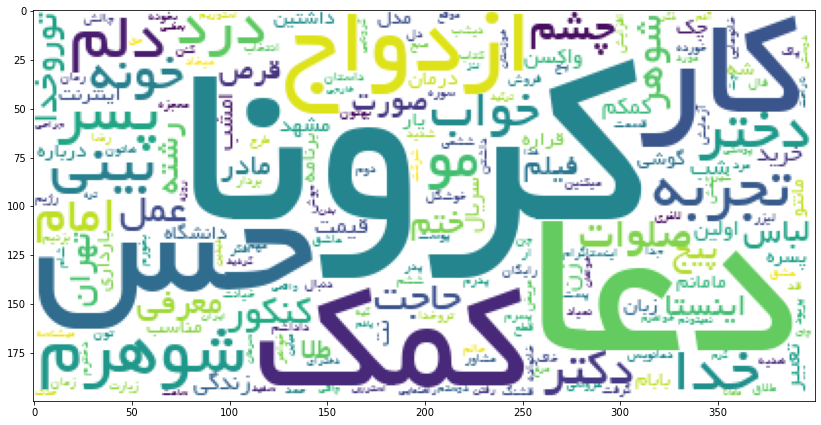

In [21]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)

# Clinic
https://www.ninisite.com/clinic/questions?page=1

In [23]:
clinic = []
for i in range(100):
    url = 'https://www.ninisite.com/clinic/questions?page={}'.format(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'lxml')
    clinic += soup.find_all('a', 'item_link')

In [24]:
items = []
for c in clinic :
    items.append(c.text.strip())

In [25]:
items_str = '\n'.join(items)

In [26]:
weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
c_clean_text = weridPatterns.sub(r'', items_str)

In [27]:
text = arabic_reshaper.reshape(c_clean_text)
text = get_display(text)

In [28]:
wordcloud = WordCloud(background_color='white', font_path='Yekan.ttf', collocations=False, stopwords=sws).generate(text)

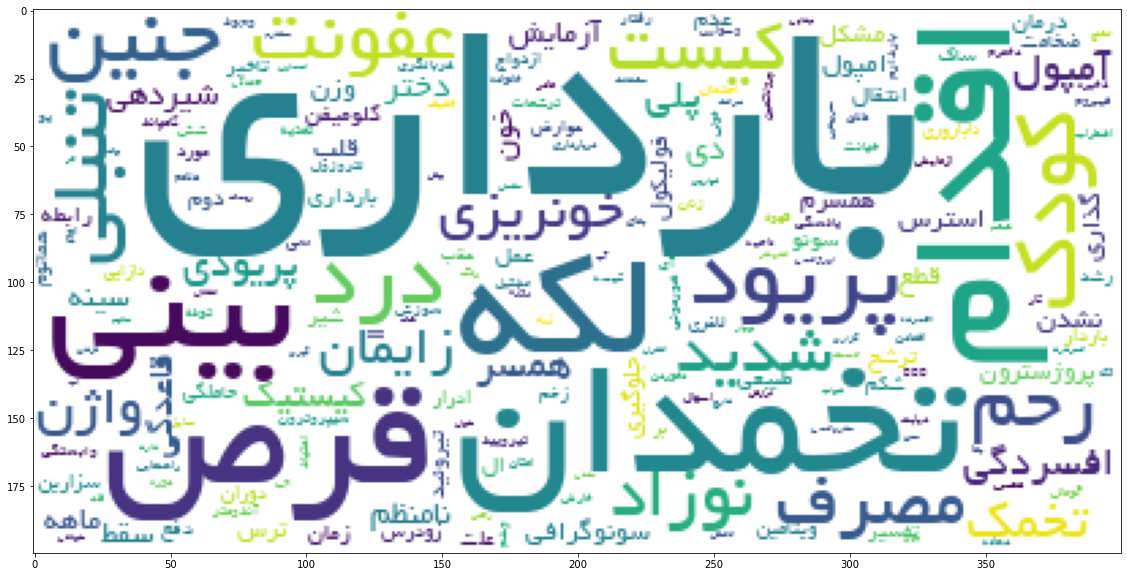

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)